In [1]:
import pandas as pd
import numpy as np
import gurobipy as gp
from gurobipy import *

In [2]:
path = 'D:/Study/McGill University - MMA/Courses/MGSC 695/Assignments/Assignment 3/'
df = pd.read_csv(path+'sales.csv')
df = df[['DAILY SALES']]
df.head()

,DAILY SALES
0,84
1,86
2,107
3,89
4,89


<function matplotlib.pyplot.show(close=None, block=None)>

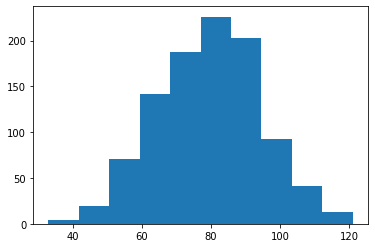

In [3]:
import matplotlib.pyplot as plt

plt.hist(df)
plt.show

In [4]:
data = np.array(df['DAILY SALES'])

In [5]:
type(data)

numpy.ndarray

In [6]:
n = len(data)

In [7]:
def neg_log_likelihood(data, mu, sigma):
    normal_dist = np.exp(-0.5 * np.power((data - mu) / sigma, 2)) / (sigma * np.sqrt(2 * np.pi))
    return -np.sum(np.log(normal_dist)) / n

In [8]:
def grad_mu(data, mu, sigma):
    return np.sum((mu - data) / np.power(sigma, 2)) / n

In [9]:
def grad_sigma(data, mu, sigma):
    return np.sum(np.power((mu - data), 2) / (2 * np.power(sigma, 3)) - 1 / (2 * sigma)) / n

In [10]:
def gradient_descent(data, mu, sigma, learning_rate=0.01, num_iterations=1000):
    for i in range(num_iterations):
        gradient_mu = grad_mu(data, mu, sigma)
        gradient_sigma = grad_sigma(data, mu, sigma)
        mu = mu - learning_rate * gradient_mu
        sigma = sigma - learning_rate * gradient_sigma
    return mu, sigma

mu, sigma = 0, 1
mu, sigma = gradient_descent(data, mu, sigma)

In [11]:
print("Estimated mu:", mu)
print("Estimated sigma:", sigma)

Estimated mu: 1.5986111954420232
Estimated sigma: -30.706642949087755


Constant learning rate for function f

Iteration 1 
x =  0.4 
y =  1.0  and f(x, y) =  -10.440000000000003
Iteration 2 
x =  0.81 
y =  0.18000000000000005  and f(x, y) =  -2.522900000000005
Iteration 3 
x =  1.22 
y =  -0.49650000000000005  and f(x, y) =  1.1476455000000023
Iteration 4 
x =  1.622825 
y =  -1.0582  and f(x, y) =  2.146863085625002
Iteration 5 
x =  2.0134525 
y =  -1.52770125  and f(x, y) =  1.508184850187499
Iteration 6 
x =  2.3884923125 
y =  -1.922833625  and f(x, y) =  -0.09327572851869004
Iteration 7 
x =  2.7457847625 
y =  -2.257691515625  and f(x, y) =  -2.219692397001694
Iteration 8 
x =  3.08409086203125 
y =  -2.5434424506249997  and f(x, y) =  -4.590389386905384
Iteration 9 
x =  3.4028538983593752 
y =  -2.7889585036015623  and f(x, y) =  -7.028619672761446
Iteration 10 
x =  3.7020164337035157 
y =  -3.0013094977992187  and f(x, y) =  -9.426139174676386
Iteration 11 
x =  3.981880265223125 
y =  -3.186148419924551  and f(x, y) =  -11.719596189508092
Iteration 12 
x =  4.24299965969704 
y =  

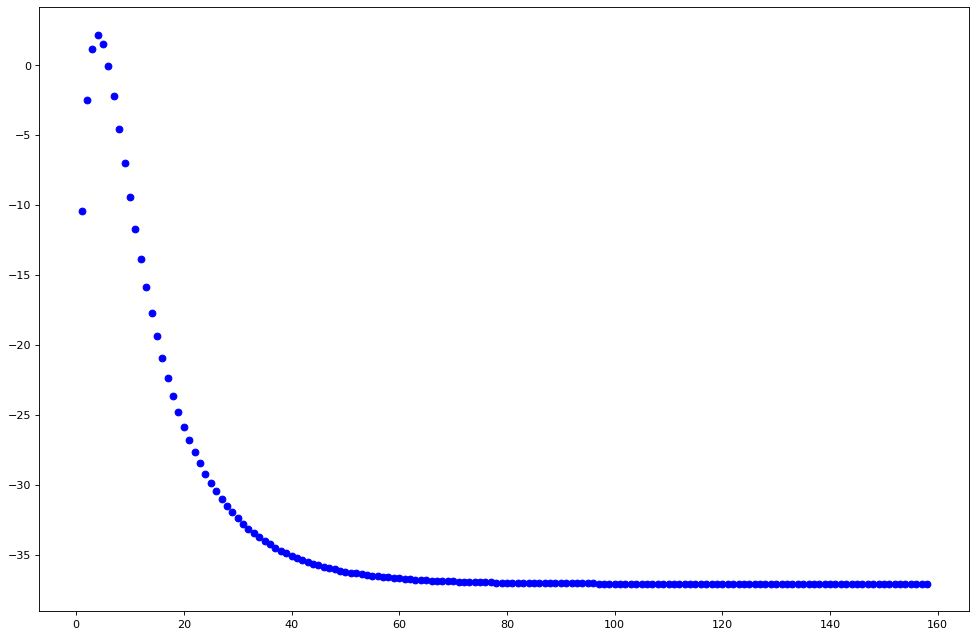

In [15]:
plt.figure(num=None, figsize=(15, 10), dpi=80, facecolor='w', edgecolor='k')

x_0 = 0
y_0 = 2

rate = 0.05

precision = 0.00001

f_delta = 1

max_iters = 1000

iters = 0

f  = lambda x, y: (x-5)**2 - 2*(y+3)**2 + x*y
dfx = lambda x: 2*(x-5) + y_0
dfy = lambda y: 4*(y+3) + x_0

data = {}
data[0] = [x_0, y_0, f(x_0, y_0)]
while f_delta > precision and iters < max_iters:
    x_new = x_0 - rate*dfx(x_0)
    y_new = y_0 - rate*dfy(y_0)
    f_delta = abs(f(x_new, y_new) - f(x_0, y_0))
    
    iters = iters + 1 
    
    data[iters] = [x_new, y_new, f(x_new, y_new)]
    plt.plot(iters, f(x_new, y_new), 'bo')
    
    print("Iteration", iters, "\nx = ", x_new, "\ny = ", y_new, " and f(x, y) = ", f(x_new, y_new)) 
    x_0 = x_new
    y_0 = y_new

print("The local minimum occurs at", x_new, y_new)



Constant learning rate for function g

Iteration 1 
x =  -0.015 
y =  1.976  and f(x, y) =  90.32243507775998
Iteration 2 
x =  -0.030100728 
y =  1.951886610944  and f(x, y) =  86.64171287721157
Iteration 3 
x =  -0.04530605084495536 
y =  1.9276852207320232  and f(x, y) =  82.96548025891222
Iteration 4 
x =  -0.06061970964993008 
y =  1.9034222804867753  and f(x, y) =  79.3017226119663
Iteration 5 
x =  -0.07604529860577877 
y =  1.8791252217858925  and f(x, y) =  75.65871041233369
Iteration 6 
x =  -0.091586243515271 
y =  1.8548223615408104  and f(x, y) =  72.04493869644176
Iteration 7 
x =  -0.10724578025560609 
y =  1.8305427948034854  and f(x, y) =  68.46905999949692
Iteration 8 
x =  -0.1230269333791974 
y =  1.8063162759972118  and f(x, y) =  64.93981150528238
Iteration 9 
x =  -0.1389324950779073 
y =  1.7821730892906786  and f(x, y) =  61.46593734778919
Iteration 10 
x =  -0.15496500474601702 
y =  1.7581439090599005  and f(x, y) =  58.056107187328635
Iteration 11 
x =  -0.17112672938359402 
y =  1.73425965160481

Iteration 250 
x =  -3.4643461875220645 
y =  1.6817667214602114  and f(x, y) =  19.824292952949353
Iteration 251 
x =  -3.4711663658894474 
y =  1.6843197936268937  and f(x, y) =  19.81476088777844
Iteration 252 
x =  -3.477945910008105 
y =  1.686862865679713  and f(x, y) =  19.805256205338516
Iteration 253 
x =  -3.4846850596786734 
y =  1.6893959663087779  and f(x, y) =  19.795778901762468
Iteration 254 
x =  -3.4913840532990204 
y =  1.6919191242558238  and f(x, y) =  19.78632896569218
Iteration 255 
x =  -3.498043127871586 
y =  1.69443236830991  and f(x, y) =  19.77690637862823
Iteration 256 
x =  -3.504662519010722 
y =  1.6969357273032806  and f(x, y) =  19.767511115265453
Iteration 257 
x =  -3.511242460950026 
y =  1.6994292301073848  and f(x, y) =  19.758143143815058
Iteration 258 
x =  -3.517783186549673 
y =  1.7019129056290492  and f(x, y) =  19.74880242631388
Iteration 259 
x =  -3.5242849273037415 
y =  1.704386782806797  and f(x, y) =  19.739488918921126
Iteration 260

Iteration 528 
x =  -4.387715424818786 
y =  2.101046572240238  and f(x, y) =  17.906182347914076
Iteration 529 
x =  -4.388976630340173 
y =  2.101799699331713  and f(x, y) =  17.901115673546176
Iteration 530 
x =  -4.390229991789514 
y =  2.102549184806891  and f(x, y) =  17.896059978344894
Iteration 531 
x =  -4.391475555711218 
y =  2.1032950437660594  and f(x, y) =  17.891015263436625
Iteration 532 
x =  -4.392713368379688 
y =  2.104037291259378  and f(x, y) =  17.885981530024207
Iteration 533 
x =  -4.393943475800911 
y =  2.1047759422869823  and f(x, y) =  17.880958779383572
Iteration 534 
x =  -4.395165923714033 
y =  2.1055110117990914  and f(x, y) =  17.87594701286028
Iteration 535 
x =  -4.396380757592929 
y =  2.1062425146961137  and f(x, y) =  17.870946231866135
Iteration 536 
x =  -4.39758802264776 
y =  2.106970465828754  and f(x, y) =  17.86595643787588
Iteration 537 
x =  -4.398787763826523 
y =  2.10769487999812  and f(x, y) =  17.86097763242383
Iteration 538 
x =  -

Iteration 681 
x =  -4.51168417546968 
y =  2.181738469414821  and f(x, y) =  17.259262419798105
Iteration 682 
x =  -4.512157778740578 
y =  2.1820830452168876  and f(x, y) =  17.255878984327595
Iteration 683 
x =  -4.512628269839121 
y =  2.1824257700147562  and f(x, y) =  17.25250626702443
Iteration 684 
x =  -4.513095667894212 
y =  2.182766652490564  and f(x, y) =  17.24914425844189
Iteration 685 
x =  -4.5135599919233735 
y =  2.1831057012925865  and f(x, y) =  17.24579294901138
Iteration 686 
x =  -4.514021260833386 
y =  2.1834429250353407  and f(x, y) =  17.24245232904267
Iteration 687 
x =  -4.51447949342091 
y =  2.1837783322996804  and f(x, y) =  17.239122388724084
Iteration 688 
x =  -4.514934708373118 
y =  2.184111931632897  and f(x, y) =  17.23580311812282
Iteration 689 
x =  -4.515386924268309 
y =  2.1844437315488188  and f(x, y) =  17.23249450718513
Iteration 690 
x =  -4.515836159576534 
y =  2.1847737405279077  and f(x, y) =  17.22919654573663
Iteration 691 
x =  -

Iteration 912 
x =  -4.567041234088067 
y =  2.2263445843441367  and f(x, y) =  16.73171265819887
Iteration 913 
x =  -4.567135738492324 
y =  2.2264341800453114  and f(x, y) =  16.730366351389563
Iteration 914 
x =  -4.567229543510253 
y =  2.226523213167537  and f(x, y) =  16.72902645283479
Iteration 915 
x =  -4.567322653899028 
y =  2.22661168687223  and f(x, y) =  16.727692940427204
Iteration 916 
x =  -4.567415074385979 
y =  2.226699604305427  and f(x, y) =  16.72636579207654
Iteration 917 
x =  -4.567506809668765 
y =  2.226786968597848  and f(x, y) =  16.725044985710166
Iteration 918 
x =  -4.567597864415549 
y =  2.2268737828649545  and f(x, y) =  16.72373049927346
Iteration 919 
x =  -4.567688243265167 
y =  2.226960050207012  and f(x, y) =  16.72242231073024
Iteration 920 
x =  -4.567777950827299 
y =  2.227045773709148  and f(x, y) =  16.721120398063295
Iteration 921 
x =  -4.5678669916826395 
y =  2.227130956441412  and f(x, y) =  16.71982473927472
Iteration 922 
x =  -4.

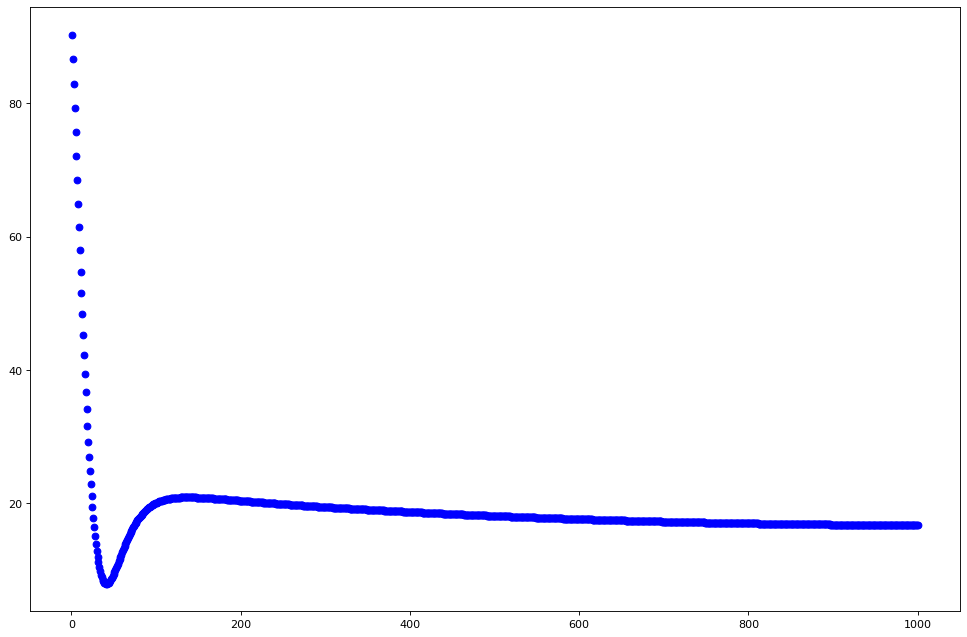

In [17]:
plt.figure(num=None, figsize=(15, 10), dpi=80, facecolor='w', edgecolor='k')

x_0 = 0
y_0 = 2

rate = 0.0015

precision = 0.00001

f_delta = 1

max_iters = 1000

iters = 0

f  = lambda x, y: (4-y)**2 + 10*((x+4)-(y-3)**2)**2
dfx = lambda x: 2*(x+4) + 2*(y_0-3)**2
dfy = lambda y: 2*(4-y) + 4*(y-3)**3 - 4*(y-3)*(x_0+4)

data = {}
data[0] = [x_0, y_0, f(x_0, y_0)]
while f_delta > precision and iters < max_iters:
    x_new = x_0 - rate*dfx(x_0)
    y_new = y_0 - rate*dfy(y_0)
    f_delta = abs(f(x_new, y_new) - f(x_0, y_0))
    
    iters = iters + 1 
    
    data[iters] = [x_new, y_new, f(x_new, y_new)]
    plt.plot(iters, f(x_new, y_new), 'bo')
    
    print("Iteration", iters, "\nx = ", x_new, "\ny = ", y_new, " and f(x, y) = ", f(x_new, y_new)) 
    x_0 = x_new
    y_0 = y_new

print("The local minimum occurs at", x_new, y_new)



Exponential decay learning rate for function f

Iteration 1 
x =  0.4 
y =  1.0  and f(x, y) =  -10.440000000000003
Iteration 2 
x =  0.81 
y =  0.18000000000000005  and f(x, y) =  -2.522900000000005
Iteration 3 
x =  1.215920431837159 
y =  -0.48976871253131227  and f(x, y) =  1.1212161605726607
Iteration 4 
x =  1.6069094363661294 
y =  -1.0359764883621914  and f(x, y) =  2.1335664694863468
Iteration 5 
x =  1.9752409672914395 
y =  -1.481572541431981  and f(x, y) =  1.611460532234818
Iteration 6 
x =  2.31596159627625 
y =  -1.8457221344912407  and f(x, y) =  0.26472579017828135
Iteration 7 
x =  2.626410310758916 
y =  -2.14408969861255  and f(x, y) =  -1.4624961667987018
Iteration 8 
x =  2.9057080181906403 
y =  -2.3892935209339443  and f(x, y) =  -3.30245524366425
Iteration 9 
x =  3.1542806609962697 
y =  -2.591410270348205  and f(x, y) =  -5.1012465564479434
Iteration 10 
x =  3.3734504095736706 
y =  -2.758456293787008  and f(x, y) =  -6.776538667973007
Iteration 11 
x =  3.565107259856983 
y =  -2.896809654634909  and f(x

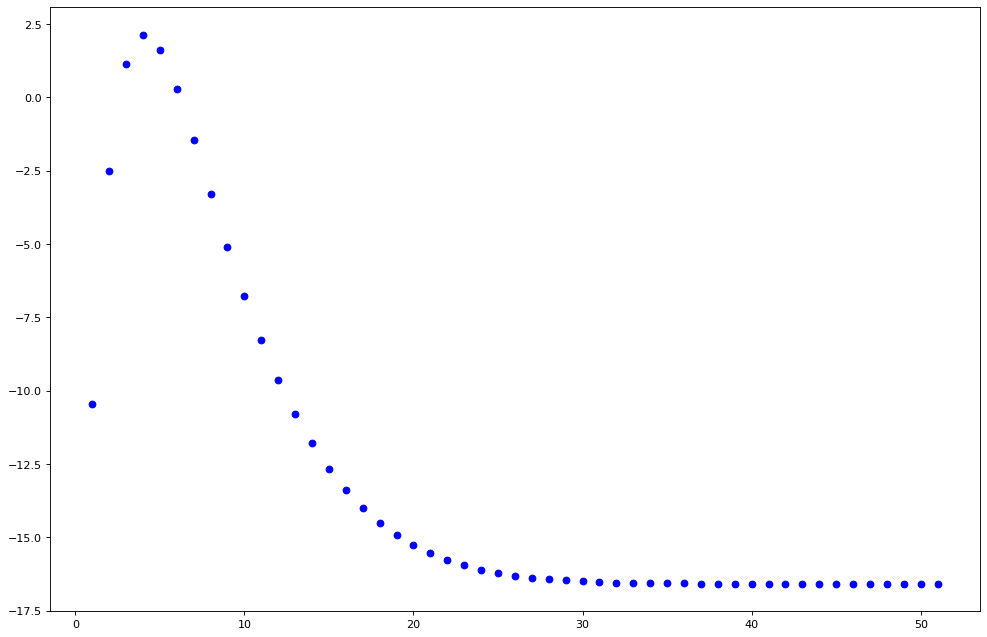

In [40]:
plt.figure(num=None, figsize=(15, 10), dpi=80, facecolor='w', edgecolor='k')

x_0 = 0
y_0 = 2

rate_0 = 0.05

precision = 0.00001

f_delta = 1

max_iters = 1000

iters = 0

f  = lambda x, y: (x-5)**2 - 2*(y+3)**2 + x*y
dfx = lambda x: 2*(x-5) + y_0
dfy = lambda y: 4*(y+3) + x_0


data = {}
data[0] = [x_0, y_0, f(x_0, y_0)]
while f_delta > precision and iters < max_iters:
    x_new = x_0 - rate_0*dfx(x_0)
    y_new = y_0 - rate_0*dfy(y_0)
    rate_new = rate_0*(math.e)**(-0.01*iters) # assuming k = 0.01
    f_delta = abs(f(x_new, y_new) - f(x_0, y_0))
    
    iters = iters + 1 
    
    data[iters] = [x_new, y_new, f(x_new, y_new)]
    plt.plot(iters, f(x_new, y_new), 'bo')
    
    print("Iteration", iters, "\nx = ", x_new, "\ny = ", y_new, " and f(x, y) = ", f(x_new, y_new)) 
    x_0 = x_new
    y_0 = y_new
    rate_0 = rate_new

print("The local minimum occurs at", x_new, y_new)



Exponential decay learning rate for function g

Iteration 1 
x =  -0.5 
y =  1.2  and f(x, y) =  8.515999999999998
Iteration 2 
x =  -1.174 
y =  0.8264  and f(x, y) =  46.11616284486041
Iteration 3 
x =  -1.9215407861964948 
y =  1.3293175815272853  and f(x, y) =  12.212250113334527
Iteration 4 
x =  -2.3941127237970927 
y =  1.3012500547417225  and f(x, y) =  23.663772419708405
Iteration 5 
x =  -2.817119321877679 
y =  1.456602420489068  and f(x, y) =  20.849567568736823
Iteration 6 
x =  -3.1396899494843047 
y =  1.561407296263067  and f(x, y) =  20.569321952048995
Iteration 7 
x =  -3.3918652521230683 
y =  1.6509735892295152  and f(x, y) =  20.201002987595913
Iteration 8 
x =  -3.588675674845376 
y =  1.7255720946613449  and f(x, y) =  19.882883365540742
Iteration 9 
x =  -3.742514760933581 
y =  1.7873144782059647  and f(x, y) =  19.612601264752882
Iteration 10 
x =  -3.8630796078055307 
y =  1.8382157476990597  and f(x, y) =  19.38268941696479
Iteration 11 
x =  -3.957873428502924 
y =  1.880062731425849  and f(x, y) =  19.1

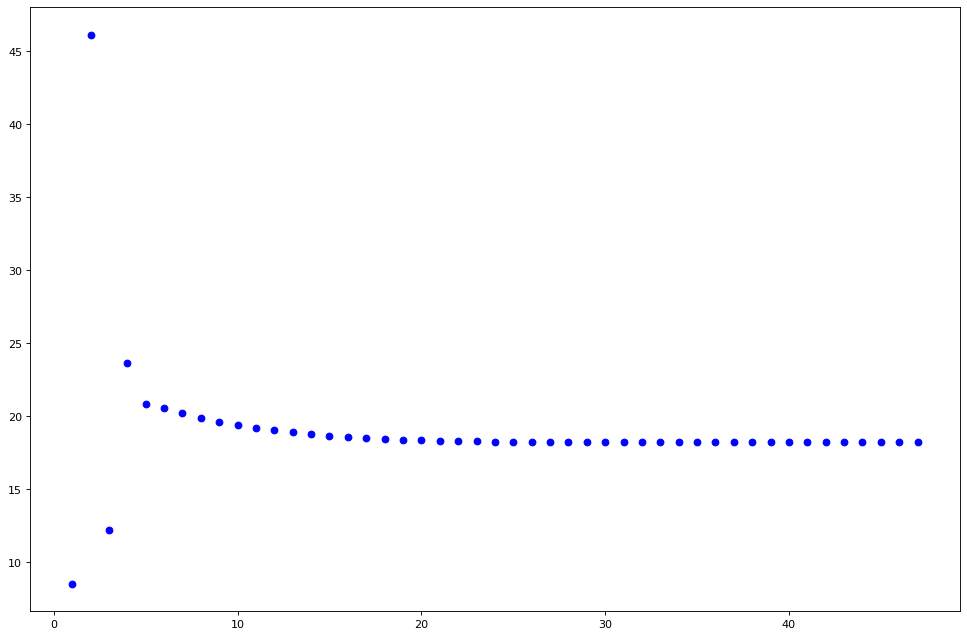

In [49]:
plt.figure(num=None, figsize=(15, 10), dpi=80, facecolor='w', edgecolor='k')

x_0 = 0
y_0 = 2

rate_0 = 0.05

precision = 0.00001

f_delta = 1

max_iters = 1000

iters = 0

f  = lambda x, y: (4-y)**2 + 10*((x+4)-(y-3)**2)**2
dfx = lambda x: 2*(x+4) + 2*(y_0-3)**2
dfy = lambda y: 2*(4-y) + 4*(y-3)**3 - 4*(y-3)*(x_0+4)


data = {}
data[0] = [x_0, y_0, f(x_0, y_0)]
while f_delta > precision and iters < max_iters:
    x_new = x_0 - rate_0*dfx(x_0)
    y_new = y_0 - rate_0*dfy(y_0)
    rate_new = rate_0*(math.e)**(-0.01*iters) # assuming k = 0.01
    f_delta = abs(f(x_new, y_new) - f(x_0, y_0))
    
    iters = iters + 1 
    
    data[iters] = [x_new, y_new, f(x_new, y_new)]
    plt.plot(iters, f(x_new, y_new), 'bo')
    
    print("Iteration", iters, "\nx = ", x_new, "\ny = ", y_new, " and f(x, y) = ", f(x_new, y_new)) 
    x_0 = x_new
    y_0 = y_new
    rate_0 = rate_new

print("The local minimum occurs at", x_new, y_new)



Inverse decay learning rate for function f

Iteration 1 
x =  0.4 
y =  1.0  and f(x, y) =  -10.440000000000003
Iteration 2 
x =  0.81 
y =  0.18000000000000005  and f(x, y) =  -2.522900000000005
Iteration 3 
x =  1.215940594059406 
y =  -0.4898019801980198  and f(x, y) =  1.1213472796784596
Iteration 4 
x =  1.607025858672064 
y =  -1.0361392289491036  and f(x, y) =  2.133672733469056
Iteration 5 
x =  1.9756076738538166 
y =  -1.4820168765580912  and f(x, y) =  1.6105195022339873
Iteration 6 
x =  2.3168155888124713 
y =  -1.8466373476488072  and f(x, y) =  0.26066957484653663
Iteration 7 
x =  2.628062391936587 
y =  -2.1456837019911186  and f(x, y) =  -1.4726152997357458
Iteration 8 
x =  2.9085244708761158 
y =  -2.3917785771815407  and f(x, y) =  -3.3221432300763607
Iteration 9 
x =  3.1586608456552754 
y =  -2.5949931651957763  and f(x, y) =  -5.134234496800277
Iteration 10 
x =  3.3798041433584096 
y =  -2.763331834763587  and f(x, y) =  -6.826509411602331
Iteration 11 
x =  3.5738343675676543 
y =  -2.903156271657975  a

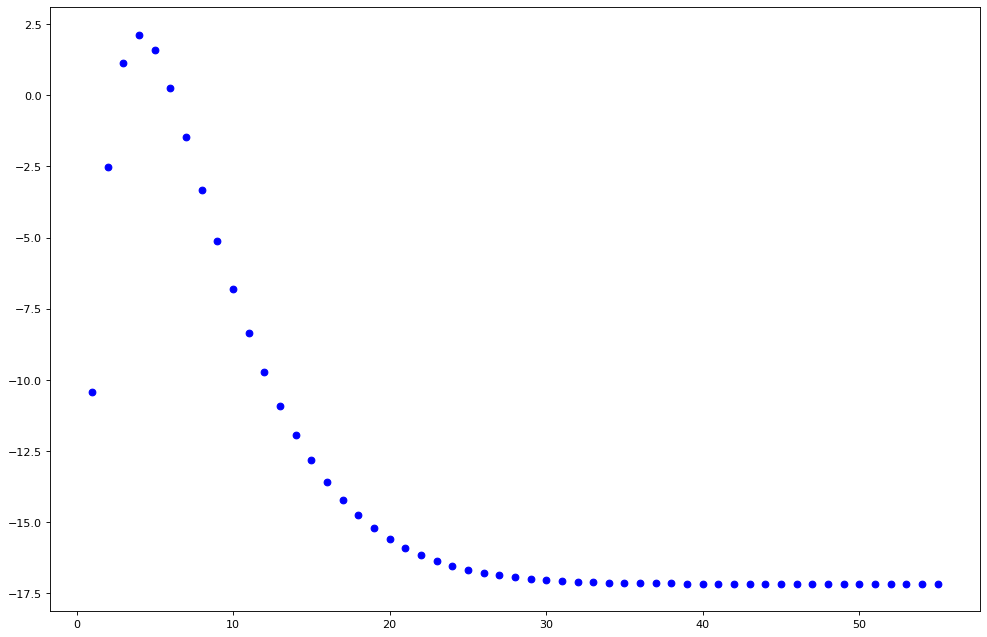

In [52]:
plt.figure(num=None, figsize=(15, 10), dpi=80, facecolor='w', edgecolor='k')

x_0 = 0
y_0 = 2

rate_0 = 0.05

precision = 0.00001

f_delta = 1

max_iters = 1000

iters = 0

f  = lambda x, y: (x-5)**2 - 2*(y+3)**2 + x*y
dfx = lambda x: 2*(x-5) + y_0
dfy = lambda y: 4*(y+3) + x_0


data = {}
data[0] = [x_0, y_0, f(x_0, y_0)]
while f_delta > precision and iters < max_iters:
    x_new = x_0 - rate_0*dfx(x_0)
    y_new = y_0 - rate_0*dfy(y_0)
    rate_new = rate_0/(1+0.01*iters) # assuming k = 0.01
    f_delta = abs(f(x_new, y_new) - f(x_0, y_0))
    
    iters = iters + 1 
    
    data[iters] = [x_new, y_new, f(x_new, y_new)]
    plt.plot(iters, f(x_new, y_new), 'bo')
    
    print("Iteration", iters, "\nx = ", x_new, "\ny = ", y_new, " and f(x, y) = ", f(x_new, y_new)) 
    x_0 = x_new
    y_0 = y_new
    rate_0 = rate_new

print("The local minimum occurs at", x_new, y_new)



Inverse decay learning rate for function g

Iteration 1 
x =  -0.5 
y =  1.2  and f(x, y) =  8.515999999999998
Iteration 2 
x =  -1.174 
y =  0.8264  and f(x, y) =  46.11616284486041
Iteration 3 
x =  -1.921577916831683 
y =  1.3293425616348515  and f(x, y) =  12.211456209577678
Iteration 4 
x =  -2.3942549076619217 
y =  1.3012520399520735  and f(x, y) =  23.66722876124514
Iteration 5 
x =  -2.817538700619936 
y =  1.456754435837723  and f(x, y) =  20.84759902633997
Iteration 6 
x =  -3.1405025351152833 
y =  1.5616800262810253  and f(x, y) =  20.568668211182676
Iteration 7 
x =  -3.3932160656775228 
y =  1.6514599978156368  and f(x, y) =  20.199655807525087
Iteration 8 
x =  -3.590679226558771 
y =  1.7263402179670575  and f(x, y) =  19.880513136478733
Iteration 9 
x =  -3.7452588309187806 
y =  1.788426409085085  and f(x, y) =  19.60885760914748
Iteration 10 
x =  -3.8666264071353456 
y =  1.839724927481354  and f(x, y) =  19.37719500645402
Iteration 11 
x =  -3.9622635277103195 
y =  1.8820126769666174  and f(x, y) =  19.179

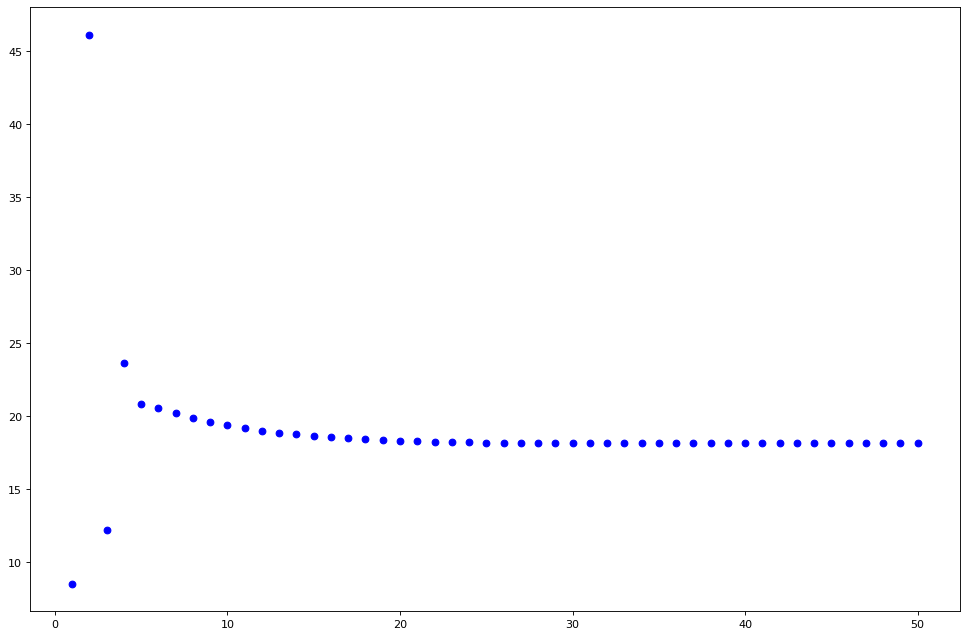

In [53]:
plt.figure(num=None, figsize=(15, 10), dpi=80, facecolor='w', edgecolor='k')

x_0 = 0
y_0 = 2

rate_0 = 0.05

precision = 0.00001

f_delta = 1

max_iters = 1000

iters = 0

f  = lambda x, y: (4-y)**2 + 10*((x+4)-(y-3)**2)**2
dfx = lambda x: 2*(x+4) + 2*(y_0-3)**2
dfy = lambda y: 2*(4-y) + 4*(y-3)**3 - 4*(y-3)*(x_0+4)


data = {}
data[0] = [x_0, y_0, f(x_0, y_0)]
while f_delta > precision and iters < max_iters:
    x_new = x_0 - rate_0*dfx(x_0)
    y_new = y_0 - rate_0*dfy(y_0)
    rate_new = rate_0/(1+0.01*iters) # assuming k = 0.01
    f_delta = abs(f(x_new, y_new) - f(x_0, y_0))
    
    iters = iters + 1 
    
    data[iters] = [x_new, y_new, f(x_new, y_new)]
    plt.plot(iters, f(x_new, y_new), 'bo')
    
    print("Iteration", iters, "\nx = ", x_new, "\ny = ", y_new, " and f(x, y) = ", f(x_new, y_new)) 
    x_0 = x_new
    y_0 = y_new
    rate_0 = rate_new

print("The local minimum occurs at", x_new, y_new)



For faster optimization, the constant k (iters in this code) should be optimized. I tried to lower the number of iteration by trial and error. The least number of iterations I could achieve for function f is 44.

Iteration 1 
x =  0.4 
y =  1.0  and f(x, y) =  -10.440000000000003
Iteration 2 
x =  0.81 
y =  0.18000000000000005  and f(x, y) =  -2.522900000000005
Iteration 3 
x =  1.2142999931477734 
y =  -0.48709498869382617  and f(x, y) =  1.1106619087523586
Iteration 4 
x =  1.6006523598824784 
y =  -1.0272225024508943  and f(x, y) =  2.12763614602793
Iteration 5 
x =  1.9604220307340836 
y =  -1.463573651455367  and f(x, y) =  1.6486003523272963
Iteration 6 
x =  2.288288735056165 
y =  -1.8159300831573617  and f(x, y) =  0.39396249554123397
Iteration 7 
x =  2.5816939940140355 
y =  -2.100630307244715  and f(x, y) =  -1.1927123977632226
Iteration 8 
x =  2.8402021748119197 
y =  -2.330889917162082  and f(x, y) =  -2.8508885721944903
Iteration 9 
x =  3.0648901977029874 
y =  -2.5172708189953217  and f(x, y) =  -4.436563635543443
Iteration 10 
x =  3.2578273425926025 
y =  -2.6681715108127393  and f(x, y) =  -5.877496826907002
Iteration 11 
x =  3.421666343436913 
y =  -2.7902719439371126  a

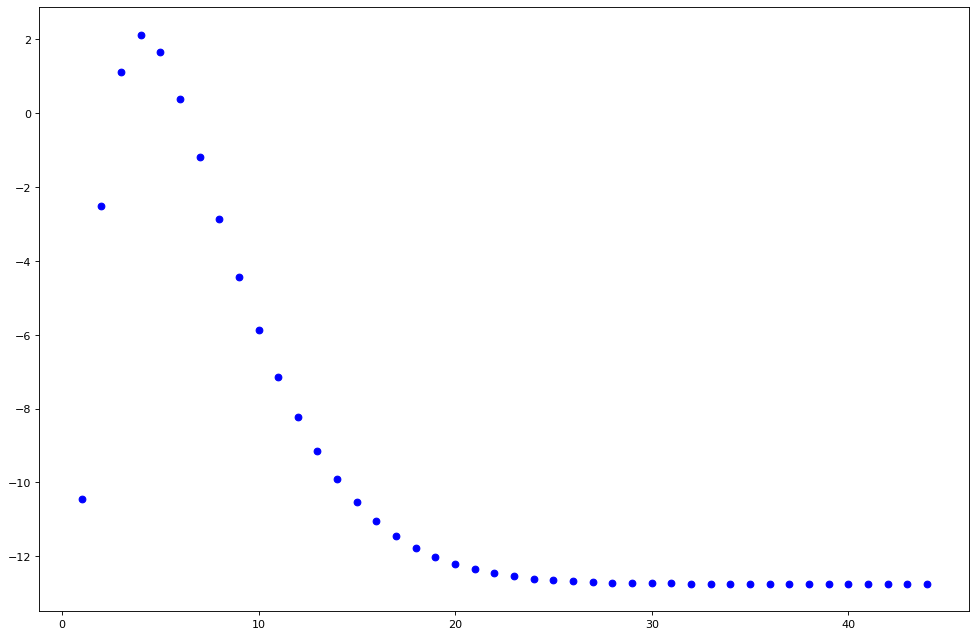

In [61]:
plt.figure(num=None, figsize=(15, 10), dpi=80, facecolor='w', edgecolor='k')

x_0 = 0
y_0 = 2

rate_0 = 0.05

precision = 0.00001

f_delta = 1

max_iters = 1000

iters = 0

f  = lambda x, y: (x-5)**2 - 2*(y+3)**2 + x*y
dfx = lambda x: 2*(x-5) + y_0
dfy = lambda y: 4*(y+3) + x_0


data = {}
data[0] = [x_0, y_0, f(x_0, y_0)]
while f_delta > precision and iters < max_iters:
    x_new = x_0 - rate_0*dfx(x_0)
    y_new = y_0 - rate_0*dfy(y_0)
    rate_new = rate_0*(math.e)**(-0.014*iters) # assuming k = 0.014
    f_delta = abs(f(x_new, y_new) - f(x_0, y_0))
    
    iters = iters + 1 
    
    data[iters] = [x_new, y_new, f(x_new, y_new)]
    plt.plot(iters, f(x_new, y_new), 'bo')
    
    print("Iteration", iters, "\nx = ", x_new, "\ny = ", y_new, " and f(x, y) = ", f(x_new, y_new)) 
    x_0 = x_new
    y_0 = y_new
    rate_0 = rate_new

print("The local minimum occurs at", x_new, y_new)



Iteration 1 
x =  0.4 
y =  1.0  and f(x, y) =  -10.440000000000003
Iteration 2 
x =  0.81 
y =  0.18000000000000005  and f(x, y) =  -2.522900000000005
Iteration 3 
x =  1.2139408866995076 
y =  -0.4865024630541873  and f(x, y) =  1.108318641558881
Iteration 4 
x =  1.5993548562654922 
y =  -1.0254058555876782  and f(x, y) =  2.126355488533008
Iteration 5 
x =  1.9575576101473373 
y =  -1.460086529664512  and f(x, y) =  1.6555852057126277
Iteration 6 
x =  2.283320924068824 
y =  -1.8105570095171355  and f(x, y) =  0.41671324233467644
Iteration 7 
x =  2.574264969212866 
y =  -2.0933549165674084  and f(x, y) =  -1.1486704048861247
Iteration 8 
x =  2.8301653456223193 
y =  -2.3218414014067377  and f(x, y) =  -2.7828108146461554
Iteration 9 
x =  3.052301920874112 
y =  -2.506673131793483  and f(x, y) =  -4.344338205535001
Iteration 10 
x =  3.24291367982943 
y =  -2.6563029160017053  and f(x, y) =  -5.763064098640042
Iteration 11 
x =  3.4047783600115316 
y =  -2.7774350480622645  and 

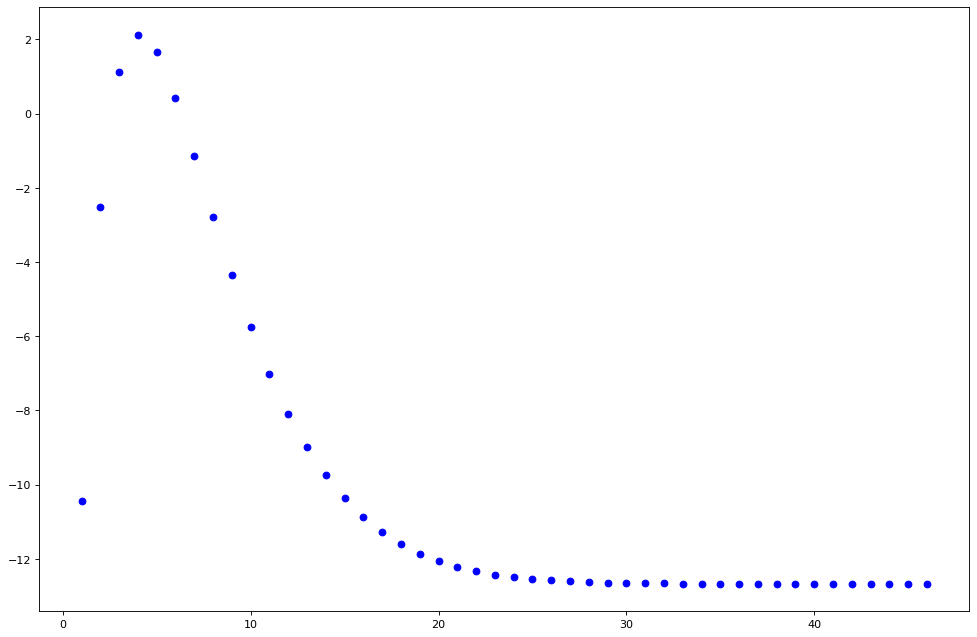

In [72]:
plt.figure(num=None, figsize=(15, 10), dpi=80, facecolor='w', edgecolor='k')

x_0 = 0
y_0 = 2

rate_0 = 0.05

precision = 0.00001

f_delta = 1

max_iters = 1000

iters = 0

f  = lambda x, y: (x-5)**2 - 2*(y+3)**2 + x*y
dfx = lambda x: 2*(x-5) + y_0
dfy = lambda y: 4*(y+3) + x_0


data = {}
data[0] = [x_0, y_0, f(x_0, y_0)]
while f_delta > precision and iters < max_iters:
    x_new = x_0 - rate_0*dfx(x_0)
    y_new = y_0 - rate_0*dfy(y_0)
    rate_new = rate_0/(1+0.015*iters) # assuming k = 0.015
    f_delta = abs(f(x_new, y_new) - f(x_0, y_0))
    
    iters = iters + 1 
    
    data[iters] = [x_new, y_new, f(x_new, y_new)]
    plt.plot(iters, f(x_new, y_new), 'bo')
    
    print("Iteration", iters, "\nx = ", x_new, "\ny = ", y_new, " and f(x, y) = ", f(x_new, y_new)) 
    x_0 = x_new
    y_0 = y_new
    rate_0 = rate_new

print("The local minimum occurs at", x_new, y_new)



The least number of iterations I could achieve for function g is 25.

Iteration 1 
x =  -0.5 
y =  1.2  and f(x, y) =  8.515999999999998
Iteration 2 
x =  -1.174 
y =  0.8264  and f(x, y) =  46.11616284486041
Iteration 3 
x =  -1.8994476171097288 
y =  1.3144541207361717  and f(x, y) =  12.69574471403503
Iteration 4 
x =  -2.33772975395751 
y =  1.2976726815637731  and f(x, y) =  22.5708340460734
Iteration 5 
x =  -2.6964468900896232 
y =  1.416030877087329  and f(x, y) =  21.206910314574476
Iteration 6 
x =  -2.9520071645829393 
y =  1.4987939329412432  and f(x, y) =  20.79139208953186
Iteration 7 
x =  -3.1332034998868443 
y =  1.5601830436489954  and f(x, y) =  20.503733532795923
Iteration 8 
x =  -3.2601207542501567 
y =  1.6048140278791267  and f(x, y) =  20.297311642053746
Iteration 9 
x =  -3.3477733133724246 
y =  1.6365237651723896  and f(x, y) =  20.15066602355455
Iteration 10 
x =  -3.4072728423234184 
y =  1.658499315799449  and f(x, y) =  20.048627403089863
Iteration 11 
x =  -3.4468181424001605 
y =  1.6733201037959058  and f(x, y) =  19.97

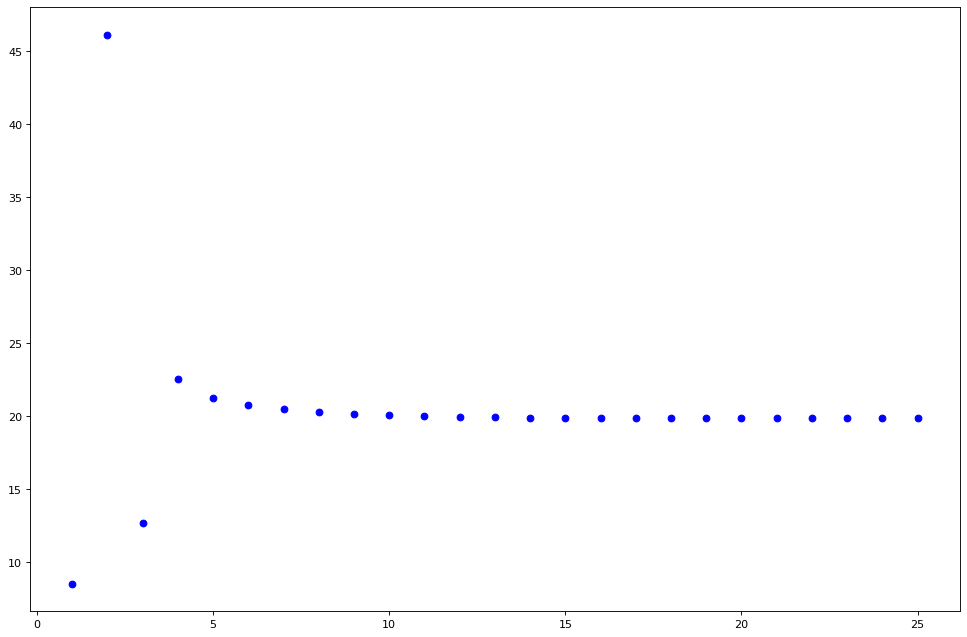

In [97]:
plt.figure(num=None, figsize=(15, 10), dpi=80, facecolor='w', edgecolor='k')

x_0 = 0
y_0 = 2

rate_0 = 0.05

precision = 0.00001

f_delta = 1

max_iters = 1000

iters = 0

f  = lambda x, y: (4-y)**2 + 10*((x+4)-(y-3)**2)**2
dfx = lambda x: 2*(x+4) + 2*(y_0-3)**2
dfy = lambda y: 2*(4-y) + 4*(y-3)**3 - 4*(y-3)*(x_0+4)


data = {}
data[0] = [x_0, y_0, f(x_0, y_0)]
while f_delta > precision and iters < max_iters:
    x_new = x_0 - rate_0*dfx(x_0)
    y_new = y_0 - rate_0*dfy(y_0)
    rate_new = rate_0*(math.e)**(-0.04*iters) # assuming k = 0.04
    f_delta = abs(f(x_new, y_new) - f(x_0, y_0))
    
    iters = iters + 1 
    
    data[iters] = [x_new, y_new, f(x_new, y_new)]
    plt.plot(iters, f(x_new, y_new), 'bo')
    
    print("Iteration", iters, "\nx = ", x_new, "\ny = ", y_new, " and f(x, y) = ", f(x_new, y_new)) 
    x_0 = x_new
    y_0 = y_new
    rate_0 = rate_new

print("The local minimum occurs at", x_new, y_new)



Iteration 1 
x =  -0.5 
y =  1.2  and f(x, y) =  8.515999999999998
Iteration 2 
x =  -1.174 
y =  0.8264  and f(x, y) =  46.11616284486041
Iteration 3 
x =  -1.893098758095238 
y =  1.310182845001143  and f(x, y) =  12.838848100665166
Iteration 4 
x =  -2.32274233032322 
y =  1.2963397382849238  and f(x, y) =  22.320944346174134
Iteration 5 
x =  -2.6675355512548116 
y =  1.4070862805918873  and f(x, y) =  21.24127465436711
Iteration 6 
x =  -2.9103261006132266 
y =  1.4852417837312135  and f(x, y) =  20.839886375761786
Iteration 7 
x =  -3.080181993863271 
y =  1.5422219903897125  and f(x, y) =  20.568122768770426
Iteration 8 
x =  -3.19774306975125 
y =  1.5830058606649349  and f(x, y) =  20.37694705943256
Iteration 9 
x =  -3.2781101336026586 
y =  1.6115965133763226  and f(x, y) =  20.243389655528514
Iteration 10 
x =  -3.332234964538226 
y =  1.631203197248758  and f(x, y) =  20.15169095029728
Iteration 11 
x =  -3.3680383100159914 
y =  1.6443376634748694  and f(x, y) =  20.09009

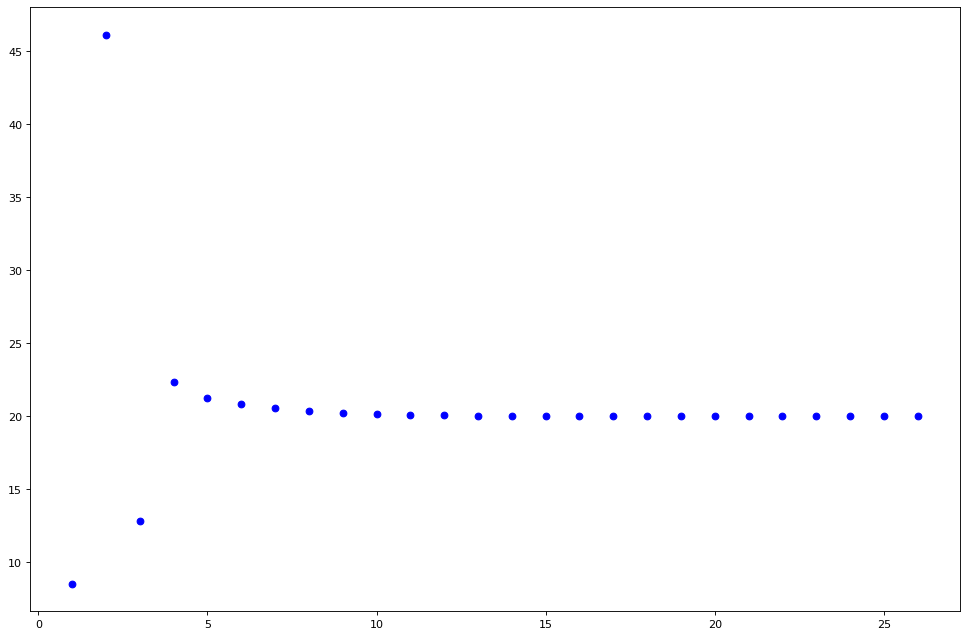

In [93]:
plt.figure(num=None, figsize=(15, 10), dpi=80, facecolor='w', edgecolor='k')

x_0 = 0
y_0 = 2

rate_0 = 0.05

precision = 0.00001

f_delta = 1

max_iters = 1000

iters = 0

f  = lambda x, y: (4-y)**2 + 10*((x+4)-(y-3)**2)**2
dfx = lambda x: 2*(x+4) + 2*(y_0-3)**2
dfy = lambda y: 2*(4-y) + 4*(y-3)**3 - 4*(y-3)*(x_0+4)


data = {}
data[0] = [x_0, y_0, f(x_0, y_0)]
while f_delta > precision and iters < max_iters:
    x_new = x_0 - rate_0*dfx(x_0)
    y_new = y_0 - rate_0*dfy(y_0)
    rate_new = rate_0/(1+0.05*iters) # assuming k = 0.05
    f_delta = abs(f(x_new, y_new) - f(x_0, y_0))
    
    iters = iters + 1 
    
    data[iters] = [x_new, y_new, f(x_new, y_new)]
    plt.plot(iters, f(x_new, y_new), 'bo')
    
    print("Iteration", iters, "\nx = ", x_new, "\ny = ", y_new, " and f(x, y) = ", f(x_new, y_new)) 
    x_0 = x_new
    y_0 = y_new
    rate_0 = rate_new

print("The local minimum occurs at", x_new, y_new)



Stochastic Gradient Descent may also help lowering the number of iterations required for minimizing the functions.